In [4]:
from scipy.fft import fft, fftfreq, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fs = 8000  # Sampling rate in Hz
n = np.arange(0, 8, 1)  # Time vector
ts = 1.0 / fs
# Signal with 1000 Hz and 2000 Hz components
x = 1.0*np.sin(2*np.pi*1000*n*ts) + 0.5*np.sin(2*np.pi*2000*n*ts + (3/4)*np.pi)

In [ ]:
x

In [ ]:
X = fft(x)

In [ ]:
np.around(X,4)

In [ ]:
N = 8
Y = np.array([0+0*1j]*N)
for m in range(N):
    Y[m] = 0 + 0*1j
    for n in range(N):
        Y[m] = Y[m] + x[n] * (np.cos(-2*np.pi*n*m/N) + 1j*np.sin(-2*np.pi*n*m/N))

In [ ]:
np.around(Y,4)

In [ ]:
np.allclose(X, Y)

In [ ]:
x_1 = np.roll(x, -3)
x_1

In [ ]:
X_1 = fft(x_1)
np.around(X_1,4)

In [ ]:
X_2 = np.array([0+0*1j]*N)
for m in range(N):
    X_2[m] = np.exp(1j * 2 * np.pi * 3 * m / N) * X[m]
np.around(X_2,4)

In [ ]:
np.allclose(X_1, X_2)

In [ ]:
x_ifft = ifft(X)
np.around(x_ifft,4)

In [ ]:
Y_inv = np.array([0+0*1j]*N)
for m in range(N):
    Y_inv[m] = 0 + 0*1j
    for n in range(N):
        # Y_inv[m] = Y_inv[m] + (1 / N) * X[n] * (np.cos(2*np.pi*n*m/N) + 1j*np.sin(2*np.pi*n*m/N))
        Y_inv[m] = Y_inv[m] + (1 / N) * X[n] * np.exp(2*np.pi*n*m/N*1j)
np.around(Y_inv, 4)

In [ ]:
np.allclose(x_ifft, Y_inv)

## 3.8 DFT leakage

In [ ]:
# exactly 3 periods over 64 samples
N  = 64
n  = np.arange(0, N, 1)
fs = 1000 * 64  # Sampling rate in Hz
fo = 1000 * 3   # 3 full cycles for 64 samples
ts = 1.0 / fs
x  = 1.0*np.sin(2*np.pi*fo*n*ts)

plt.xlabel('n');
plt.ylabel('x[n]');
plt.title(r'$x[n] = \sin (2\pi f_o n t_s)$');
plt.stem(n, x);

In [ ]:
X = fft(x)
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of DT signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(n, X_m)

In [ ]:
k = 28.6
k = 3.4
k = 16.4
fo = 1000 * k   # 3.4 full cycles for 64 samples
x  = 1.0*np.sin(2*np.pi*fo*n*ts)

plt.xlabel('n');
plt.ylabel('x[n]');
plt.title(r'$x[n] = \sin (2\pi f_o n t_s)$');
plt.stem(n, x);

In [ ]:
X = fft(x)
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(n, X_m)

X_sinc = np.zeros_like(X_m)
for m in range(N):
    if m >= N // 2:
        X_sinc[m] = np.absolute(N / 2 * np.sinc((k - (N - m))))
    else:
        X_sinc[m] = np.absolute(N / 2 * np.sinc((k - m)))

plt.stem(n, X_sinc, 'r')


## 3.9 Windows

/Users/yg943079/mypy/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yg943079/mypy/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


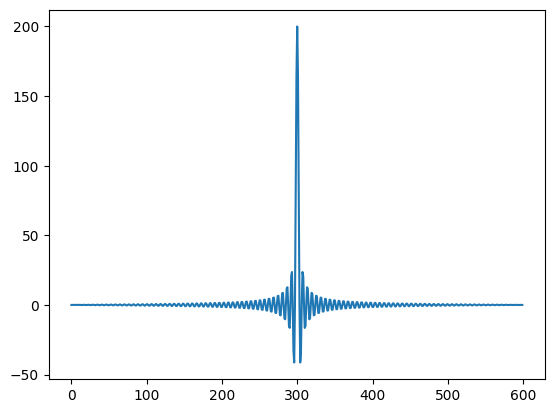

In [12]:
x = np.arange(-3, 3, 0.01)
y = np.zeros(len(x))
y[200:400] = 1
yShift = np.fft.fftshift(y)
fftyShift = np.fft.fft(yShift)
ffty = np.fft.fftshift(fftyShift)

plt.plot(ffty)
plt.show()

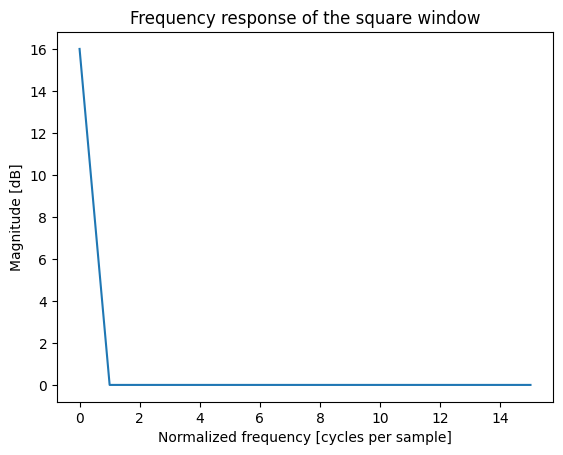

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


array([16.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,
        0.+0.j,  0.-0.j])

In [11]:
N = 16
window = 1 + np.zeros(N)
plt.figure()
A = fft(window)
mag = np.abs(A)
# freq = np.linspace(-0.5, 0.5, len(A))
# with np.errstate(divide='ignore', invalid='ignore'):
#    response = 20 * np.log10(mag)
# response = np.clip(response, -100, 100)
plt.plot(mag)
plt.title("Frequency response of the square window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
# plt.xlim([0, 0.12])
# plt.ylim([-60, 5])
plt.show()
print(window)
np.around(A, 4)

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.hanning.html
N = 64

import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
window = np.hanning(N)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

print(window)
print(f'The window size is: {window.size}')

In [ ]:
plt.figure()
A = fft(window, 2048) / (N / 2)
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
with np.errstate(divide='ignore', invalid='ignore'):
    response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)
plt.title("Frequency response of the Hann window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.xlim([0, 0.12])
plt.ylim([-60, 5])
plt.show()

In [ ]:
window = np.hamming(N)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()
plt.figure()
A = fft(window, 2048) / (N/2)
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)
plt.title("Frequency response of Hamming window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.xlim([0, 0.12])
plt.ylim([-60, 5])
plt.show()